# SCIENTIFIC COMPUTING – FIRST LAB

Natalia Lara Davila

This work will implement a scientific analysis based on data from the transmission spectrum of an optical fiber with an interferometric structure SMS (singlemode-multimode-singlemode), this structure will have changes in the geometry and the refractive index of the surrounding environment. I will use programming concepts such as object-oriented programming (OOP), numerical derivation and integration, vectorization, and handling of matrices, vectors, and tensors.



## Context

The SMS structure consist of a section of coreless multimode fiber (MMF) spliced between two single mode fiber (SMF) as a shown in the figure. In this configuration, the light propagating through the input section SMF enters the MMF section and excites multiple modes of propagation, creating a phenomenon of interference in the different modes along the way, called multimodal interference (MMI). Finally, the light is collected in the SMF output section and carried to the detector, as a Analyzed by the transmission spectrum [1].

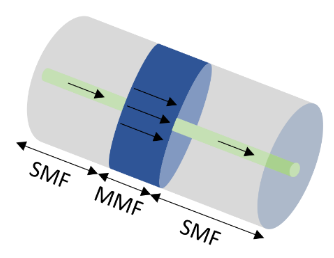

At the MMF section, part of the light that goes to the cladding has contact with the "sample" with a different specific refractive index (RI), changing the conditions of light propagation in the output section SMF and provoking changes in the transmission spectrum. For this motive, when evaluating the structure of different RI of the surrounding environment, we have the sensor sensitivity to analyze the landslide of resonance Peaks as a function of wavelength, and changes in transmission amplitudes [2]. Also, recent studies have shown that reducing the diameter of the section MMF better the sensor performance, because more light comes out towards the cladding allowing more interaction with the "sample" [1 - 3]

## Data loading and initial visualization.

The data obtained from the FIMMWAVE optical structure modeling simulation software was designed for the structure shown in the previous figure, keeping constant parameters such as the core and cladding diameter of the SMF, the propagation wavelength (given by the light source), the RI of the fiber material, the numerical aperture and the length of each section. In particular, the MMF section is 1.44$mm$ to avoid total loss of light at the structure. On the other hand, basic parameters such as the RI of the surrounding center were varied between 1.33 and 1.41 with steps of 0.02 to simulate liquid substances such as water, ethanol, propanol, methanol, etc. commonly used in experimental testing. The structure's performance was evaluated when changing the section MMF. This diameter was initially 125µm and then reduced to 25$\mu m$ to identify if the sensor was more sensitive.

This data was chosen to characterize the sensor evaluating the peaks transmission when the RI of the "sample" changes, which will allow optimizing the sensor design to determine the diameter optimum of the MMF, the wavelength effective of the source light, and the range of wavelength to work in the spectrum, etc.

In addition, the analysis through OOP, vectorization, handling of matrices, numerical derivation, and integration would facilitate the visualization of the transmission spectrum, optimization at the calculate numerical optimization, identification of spectral peaks adequate for evaluating the sensitivity, and analysis changes in the transmission and efficiency of the sensor.


In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path


In [17]:
Data_root = Path().resolve()
data_path = Data_root.parents[1] / "Data" / "raw" / "Data_SP.csv"

Data = pd.read_csv(data_path)


<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\l'
<>:30: SyntaxWarning: invalid escape sequence '\m'
<>:31: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\l'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\l'
<>:30: SyntaxWarning: invalid escape sequence '\m'
<>:31: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\l'
C:\Users\ITM\AppData\Local\Temp\ipykernel_146124\3373030746.py:19: SyntaxWarning: invalid escape sequence '\m'
  ax[i].plot(Data.Wavelength, Data[unetching[i]], linestyle="--", color=colors[i], label=f'RI {RI[i]} - 125$\mu m$')
C:\Users\ITM\AppData\Local\Temp\ipykernel_146124\3373030746.py:20: SyntaxWarning: invalid escape sequence '\m'
  ax[i].plot(Data.Wavelength, Data[etching[i]], l

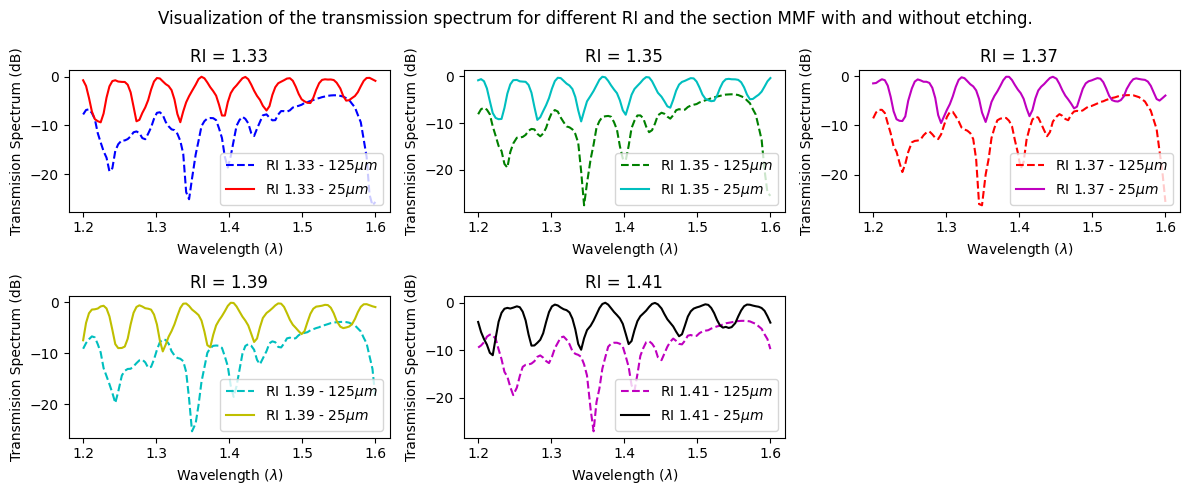

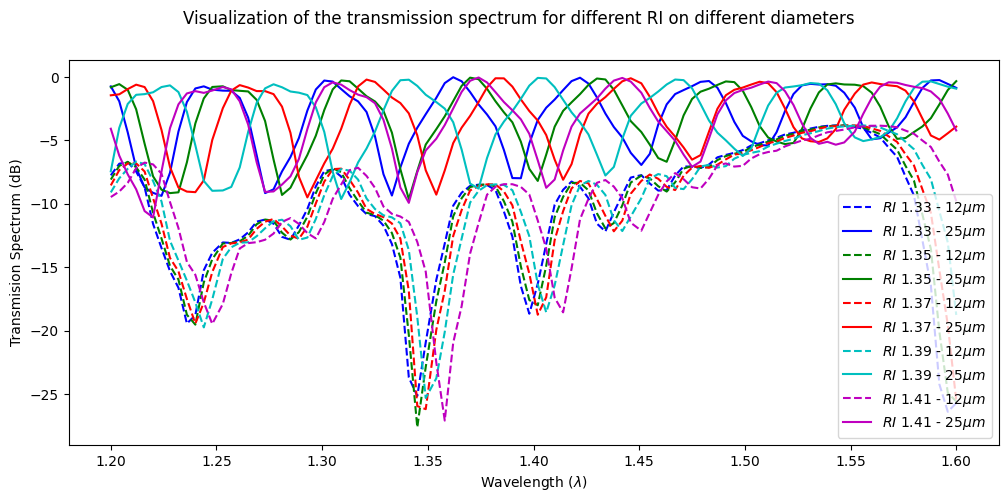

In [12]:
# list of values RI for every column
RI = ['1.33', '1.35', '1.37', '1.39', '1.41']
unetching = ['RI_Water', 'RI_B', 'RI_C', 'RI_D', 'RI_E']
etching = ['RI_Water_etching', 'RI_B_etching', 'RI_C_etching', 'RI_D_etching', 'RI_E_etching']

# Visualisation RI for separate
fig, ax = plt.subplots(figsize=(12,5), nrows = 2, ncols= 3)
fig.suptitle('Visualization of the transmission spectrum for different RI and the section MMF with and without etching.')

# Visualisation of all RI on different diameters
fig2,ax2 = plt.subplots(figsize=(12,5))
fig2.suptitle('Visualization of the transmission spectrum for different RI on different diameters')

ax = ax.flatten() # Change the axis to an array 1D for the iteration
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'gray', 'maroon']


for i in range(len(RI)):
    ax[i].plot(Data.Wavelength, Data[unetching[i]], linestyle="--", color=colors[i], label=f'RI {RI[i]} - 125$\mu m$')
    ax[i].plot(Data.Wavelength, Data[etching[i]], linestyle="-", color=colors[i+2], label=f'RI {RI[i]} - 25$\mu m$')

    ax[i].set_title(f'RI = {RI[i]}')
    ax[i].legend()
    ax[i].set_xlabel('Wavelength ($\lambda$)')
    ax[i].set_ylabel('Transmision Spectrum (dB)')


    ax[5].set_axis_off()

    ax2.plot(Data.Wavelength, Data[unetching[i]], linestyle='--', color=colors[i], label=f'$RI$ {RI[i]} - 12$\mu m$')
    ax2.plot(Data.Wavelength, Data[etching[i]], linestyle='-', color=colors[i], label=f'$RI$ {RI[i]} - 25$\mu m$')

    ax2.legend()
    ax2.set_xlabel('Wavelength ($\lambda$)')
    ax2.set_ylabel('Transmision Spectrum (dB)')


fig.tight_layout()
plt.show()

## OOP for data processing

Implement OOP to analyze the lineality of the landslide concering the first resonance peak obtained with the transmission spectrum. To do this, implement two classes colled Spectrum an AnalyzeSpectrum.

The class Spectrum has a method called firstMinimumPeak, this method identifies the position of the first resonance peak in the range 1.20 to 1.27 $\mu m$.This value was chosen through visual analysis of the graph obteined after loading the data, in the graph visualizes the first peak of resonance for the different RI to different diameters in the section MMF was a landslide in this range. This analysis is important to evaluating the detection range of the sensor.

In adition, the second class called AnalyzeSpectrum used a method called landslide to analyze the landslide of the first peak of resonance on the variation of RI and MMF diameter. For this purpose, empty lists such as minpeak125, minpeak25 and RI_values where the minimum values obtained are stored, but the list called spectra stores all the data obtained for the Analysis.

<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\m'
<>:42: SyntaxWarning: invalid escape sequence '\l'
<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\m'
<>:42: SyntaxWarning: invalid escape sequence '\l'
C:\Users\ITM\AppData\Local\Temp\ipykernel_146124\2850145240.py:38: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(self.RI_values, self.minPeak125,  marker = 'o', linestyle="--", label=f'125$\mu m$')
C:\Users\ITM\AppData\Local\Temp\ipykernel_146124\2850145240.py:39: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(self.RI_values, self.minPeak25, marker = '*', linestyle="-", label=f'25$\mu m$')
C:\Users\ITM\AppData\Local\Temp\ipykernel_146124\2850145240.py:42: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel('Wavelength ($\lambda$)')


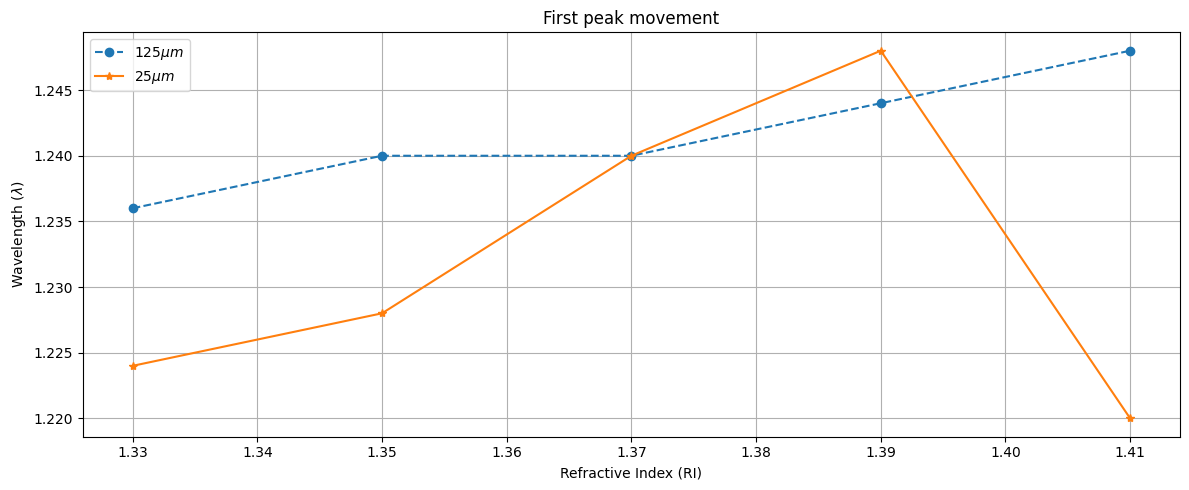

In [13]:
class Spectrum:
  def __init__(self, Wavelength, Transmission, TransmissionEtching, RI):
    self.Wavelength =np.array(Wavelength)
    self.Transmission = np.array(Transmission)
    self.TransmissionEtching = np.array(TransmissionEtching)
    self.RI = RI

  def firstMinimumPeak (self):
    interval = (self.Wavelength >= 1.20) & (self.Wavelength <= 1.27)
    # Filter values in the interval 1.20 and 1.30
    Wavelength_interval = self.Wavelength[interval]
    Transmission_interval  = self.Transmission[interval]
    TransmissionEtching_interval = self.TransmissionEtching[interval]
   # Find the position of the minimum values in the interval. Extract the wavelength value.
    minTransmission = Wavelength_interval[np.argmin(Transmission_interval)]
    minTransmissionEtching = Wavelength_interval[np.argmin(TransmissionEtching_interval)]

    return minTransmission, minTransmissionEtching

class AnalyzeSpectrum:
  def __init__(self, spectra):
      self.spectra = spectra # Different spectrum

  def landslide(self):
    self.minPeak125 = []
    self.minPeak25 = []
    self.RI_values = []

    for spectrum in self.spectra:
      min_125, min_25 = spectrum.firstMinimumPeak()
      if min_125 is not None and min_25 is not None:
        self.minPeak125.append(min_125)
        self.minPeak25.append(min_25)
        self.RI_values.append(float(spectrum.RI))

  def plotLandslide(self):
    plt.figure(figsize = (12,5))
    plt.plot(self.RI_values, self.minPeak125,  marker = 'o', linestyle="--", label=f'125$\mu m$')
    plt.plot(self.RI_values, self.minPeak25, marker = '*', linestyle="-", label=f'25$\mu m$')
    plt.title(f'First peak movement')
    plt.xlabel('Refractive Index (RI)')
    plt.ylabel('Wavelength ($\lambda$)')
    plt.legend()

    plt.tight_layout()
    plt.grid()
    plt.show()

spectra = []
for col_ri, col_unetching, col_etching in zip(RI, unetching, etching):
  spectra.append(Spectrum(Data['Wavelength'], Data[col_unetching], Data[col_etching], col_ri))


# Landslide analysis of first resonance peak
analyzer = AnalyzeSpectrum(spectra)
analyzer.landslide()  # Calculate the landdlide
analyzer.plotLandslide()

## Numerical derivation or integration of data.

The gradient is the quantity that helps to understand the variation of one quantity ($\lambda$) with respect to another quantity ($RI$), and this operation is calculated from partial derivatives. For this mathematical operation, it's possible to identify the speed with which the wavelength changes with respect to RI. This makes it possible to obtain the sensitivity of the sensor, which is described as the change in wavelength in response to an RI.

1. **Gradient** ($\nabla$) \\

$\nabla f = \left[ \begin{matrix} \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2},& \dots &, \frac{\partial f}{\partial x_n} \end{matrix} \right]$ \\

$\ f  = \lambda ; \ x   = \ RI $

2. **sensitivity of the sensor** ($\ S $)   \\

$\ S = \frac{\Delta \lambda}{\Delta RI}$ \\

To analyse the sensitivity of the sensor taking into account the first peak of resonance, it defines a class called Sensitivity, which is a daughter of the class AnalyzeSpectrum, this allows inheriting the landslide method for optimising the code avoiding repetitive calculations, inside Sensitivity it's created a method called Gradient for calculating the sensitivity using the function np.gradient, the values for each diameter of the MMF in the function of RI.


<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ITM\AppData\Local\Temp\ipykernel_146124\3527416919.py:14: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(self.RI_values, self.sensitivity125,  marker = 'o', linestyle="--", label=f'125$\mu m$')
C:\Users\ITM\AppData\Local\Temp\ipykernel_146124\3527416919.py:15: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(self.RI_values, self.sensitivity25, marker = '*', linestyle="-", label=f'25$\mu m$')
C:\Users\ITM\AppData\Local\Temp\ipykernel_146124\3527416919.py:18: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('Sensivity ($\Delta \mu m$/$\Delta RI$)')


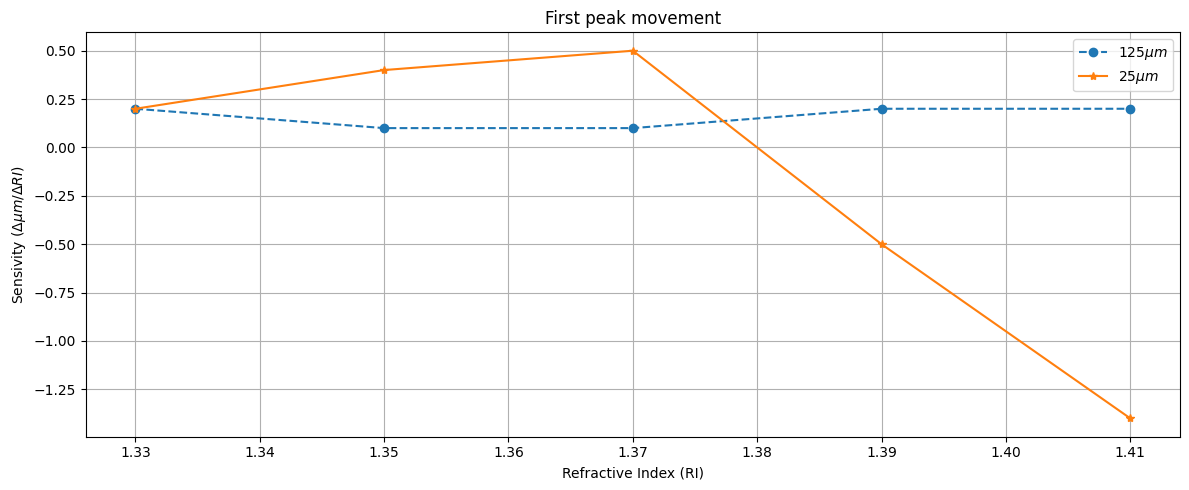

In [14]:
class Sensitivity(AnalyzeSpectrum):

  def __init__(self, spectra):
      super().__init__(spectra) # To load Landslide method

  def gradient(self):
    self.landslide()

    self.sensitivity125 = np.gradient(self.minPeak125, self.RI_values)
    self.sensitivity25 = np.gradient(self.minPeak25, self.RI_values)

  def plotSensitivity (self):
    plt.figure(figsize = (12,5))
    plt.plot(self.RI_values, self.sensitivity125,  marker = 'o', linestyle="--", label=f'125$\mu m$')
    plt.plot(self.RI_values, self.sensitivity25, marker = '*', linestyle="-", label=f'25$\mu m$')
    plt.title(f'First peak movement')
    plt.xlabel('Refractive Index (RI)')
    plt.ylabel('Sensivity ($\Delta \mu m$/$\Delta RI$)')
    plt.legend()

    plt.tight_layout()
    plt.grid()
    plt.show()


spectra = []
for ri, col, col_etching in zip(RI, unetching, etching):
  spectra.append(Spectrum(Data['Wavelength'], Data[col], Data[col_etching], ri))


# sensitivity analysis of first resonance peak
analyzerSensitivity = Sensitivity(spectra)
analyzerSensitivity.gradient()  # Calculate the sensitivity
analyzerSensitivity.plotSensitivity()



### Explanation of results

It's evident that the behaviour of the transmission spectrum is different for the different diameters of the MMF fibre, for the fibre with the "original" diameter (125$\mu m$) the sensitivity firstly decreases a little, then is relatively stable and finally it is appreciated a little increase, however for the etched fibre (25$\mu m$) the sensitivity increases drastically between 1.33 and 1.37, but then decreases abruptly, this could indicate the presence of errors in the simulation parameters, because it would be expected that to reach a saturation level, the sensitivity increase but only a little bit or the sensitivity it's constant.

## Matrix operations


Has been built a covariance matrix using the function .cov of numpy, the objective is to analyse the relationship between the transmission and the different fibre conditions (25 and 125)$\mu m$ and the different $RI$ (1.33, 1.35, ..., 1.41), after having employed the heat map for the identification of patrons between RI and MMF diameter. \\

$\sum =\left[ \begin{matrix}
Var(X_{1}) & Cov(X_{1},X_{2}) & \dots & Cov(X_{1},X_{n})\\
Cov(X_{2},X_{1}) & Var(X_{2}) & \dots & Cov(X_{2},X_{n})\\
\vdots & \vdots & \ddots & \vdots\\
Cov(X_{n},X_{1}) & Cov(X_{n},X_{2}) & \dots & Var(X_{n})\\
\end{matrix} \right]$ \\

The heat map makes it possible to identify the relationship between transmission in different conditions by applying the covariance matrix. In this, to a high covariance, the transmission in both conditions increases or decreases, to a low or negative covariance when one condition decreases the other condition and when the covariance is zero, there's no relationship between the conditions.


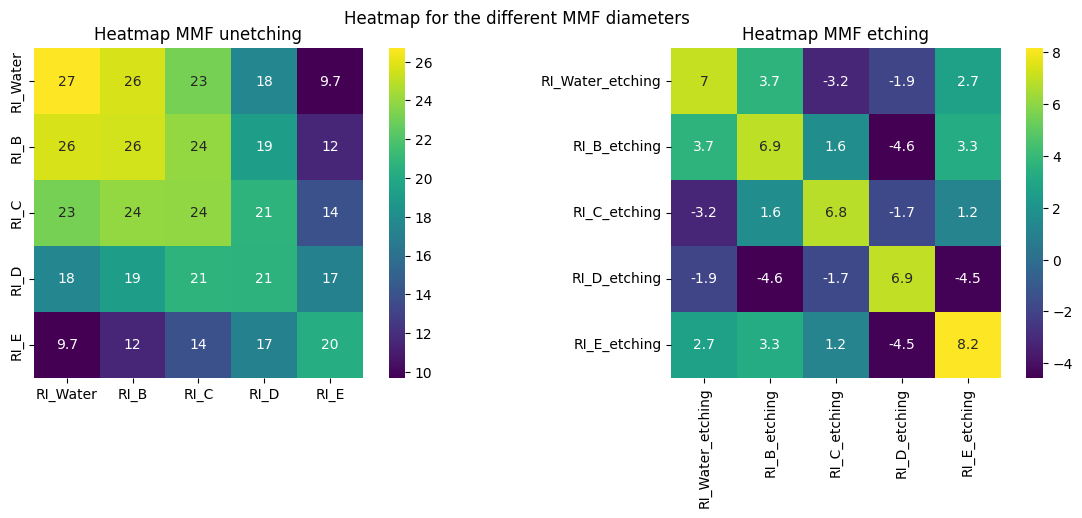

In [15]:
import seaborn as sns
# MMF unetching covariance matrix
cov_unetching = Data[unetching].cov()

# MMF etching covariance matrix
cov_etching = Data[etching].cov()


color_map = sns.color_palette("viridis", as_cmap=True)
# Heatmap figure
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Heatmap for the different MMF diameters')
# heatmap MMF UNetching covariance matrix
sns.heatmap(cov_unetching, annot=True, cmap=color_map, square=True, ax=ax[0])
ax[0].set_title('Heatmap MMF unetching')

# heatmap MMF etching covariance matrix
sns.heatmap(cov_etching, annot=True, cmap=color_map, square=True, ax=ax[1])
ax[1].set_title('Heatmap MMF etching')

plt.tight_layout()

## Explanation of the results on the heat map and covariance for the various MMF diameters to the various RI.

The heat map for the MMF with etching shows a high covariance in the diagonal, indicating the high correlation of each RI with itself. However, outside the diagonal, the majority of the values are low or negative, which indicates that the transmission in different RI doesn't follow the same pattern, indicating that the increase in transmission for one RI implies an increase for the other. On the other hand, the heat map for the heat map with "original" diameter, the covariance in generally it's positive or relatively high between the different RI, indicated the transmission in the different conditions crease or increase similar, however, it is evidence to increase RI the relationship between the different RI is older because the covariance decrease.

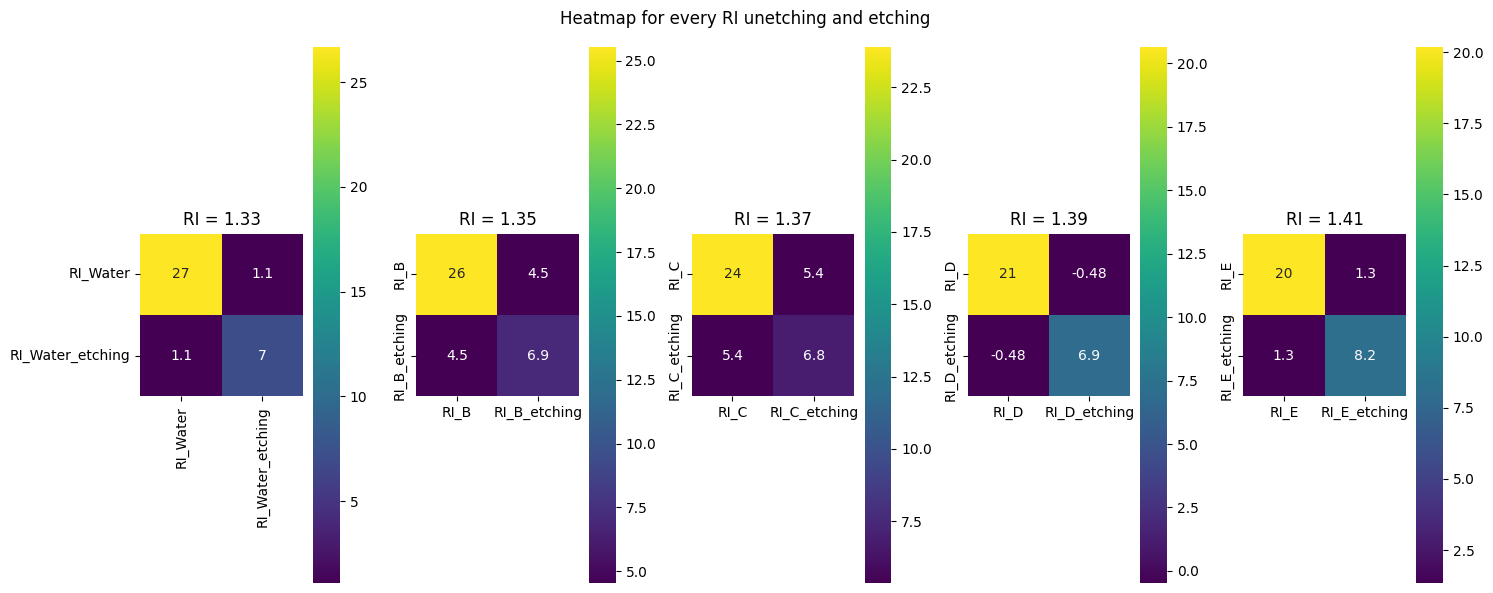

In [16]:
fig, ax = plt.subplots(1, 5, figsize=(15, 6))
fig.suptitle('Heatmap for every RI unetching and etching')

color_map = sns.color_palette("viridis", as_cmap=True)

for i in range(len(RI)):
  MMFdiameter = Data[[unetching[i],etching[i]]].cov()
  sns.heatmap(MMFdiameter, annot=True, cmap=color_map, square=True, ax=ax[i])
  ax[i].set_title(f'RI = {RI[i]}')

plt.tight_layout()

## Explanation of the results on the heat map and covariance for the different RI for the different diameters.

Observing the first and last values of RI (1.33, 1.35, 1.37, 1.41), the covariance values of the etching and unetching fibres are low but positive, indicating that in general both fibres have a similar response, however for RI = 1.39 it's possible to observe a negative covariance, indicating that the relationship between the transmissions is reversed.

## Discussion of results

The results show that a decrease in the MMF diameter is both a landslide of the first peak and a significant variation in the sensitivity of the sensor to small changes in the "sample" RI; however, the stability is compromised. At the same time, the covariance values obtained show that the MMF fibre with etching has high variation in transmission, which may be due to interference effects for the reduced diameter. This could be beneficial for the precision detection of the interest "sample". However, the uneven variability in sensitivity is a significant challenge.

On the other hand, the 125 $\mu m$ MMF shows relatively small changes in sensitivity and heat map. This may be poor for use as a biosensor, as the difference between each RI is not high enough for effective detection.

## Conclusions

The diameter at the MMF section has many influences on the sensitivity of the sensor, but the instability in the sensitivity suggests possible errors in the simulation or interferences that may affect the reliability of the sensor. On the other hand, the results indicate that the fibre with etching could be more useful as a biosensor, but the instability may be counterproductive in practical implementation. On the contrary, the 125$\mu m$ MMF shows a stable response, but the sensitivity limits its biosensor capacity

## Referencias

[1] Y. Cardona-Maya, A. B. Socorro, I. Del Villar, J. L. Cruz, J. M. Corres, and J. F. Botero-Cadavid, “Label-free wavelength and phase detection based SMS fiber immunosensors optimized with cladding etching,” Sens Actuators B Chem, vol. 265, pp. 10–19, Jul. 2018, doi: 10.1016/J.SNB.2018.03.002.

[2] ​​Semenova, Y., Farrell, G., Wu, Q., & Wang, P. (2011). High sensitivity SMS fiber structure based refractometer – analysis and experiment. Optics Express, Vol. 19, Issue 9, Pp. 7937-7944, 19(9), 7937–7944. 10.1364/OE.19.007937

​[3]	A. B. Socorro et al., “Fiber-Optic Immunosensor Based on an Etched SMS Structure,” IEEE Journal of Selected Topics in Quantum Electronics, vol. 23, no. 2, pp. 314–321, Mar. 2017, doi: 10.1109/JSTQE.2016.2633819.

**Subplots:** https://interactivechaos.com/es/manual/tutorial-de-matplotlib/la-funcion-subplots

**Covariance matrix:** https://www.youtube.com/watch?v=jo3XizfYjek

**Heatmap:** https://seaborn.pydata.org/generated/seaborn.heatmap.html